# Modèle de machine learning avec sklearn

---

##### Importation des librairies nécéssaires et implémentation du dataset

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

dataset = pd.read_csv('AEP_hourly.csv')
dataset = dataset.set_index('Datetime')
dataset.index = pd.to_datetime(dataset.index)

In [2]:
#split train et test
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
daily_data["day_of_week"] = daily_data.index.isocalendar().day
daily_data["day_of_year"] = daily_data.index.strftime("%j")
nb_lines = daily_data.shape[0]
train = daily_data.iloc[:int(nb_lines*0.8)]
test = daily_data.iloc[int(nb_lines*0.8)+1:]

## On réalise un modèle polynomial
---

In [ ]:
# fit du modèle de degré 5
test_predictions_p = test

X = train[["day_of_year", "day_of_week"]].values

model = Pipeline([('poly', PolynomialFeatures(degree=5)),
                   ('linear', LinearRegression(fit_intercept=True))])
model.fit(X, train["AEP_MW"].values)
test_predictions_p["prediction"] = model.predict(test[["day_of_year", "day_of_week"]].values)

/tmp/ipykernel_45503/1781857652.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_predictions_p["prediction"] = model.predict(test[["day_of_year", "day_of_week"]].values)


#### Affichage des prédictions

<AxesSubplot:xlabel='jour de l année', ylabel='Consommation éléctrique'>

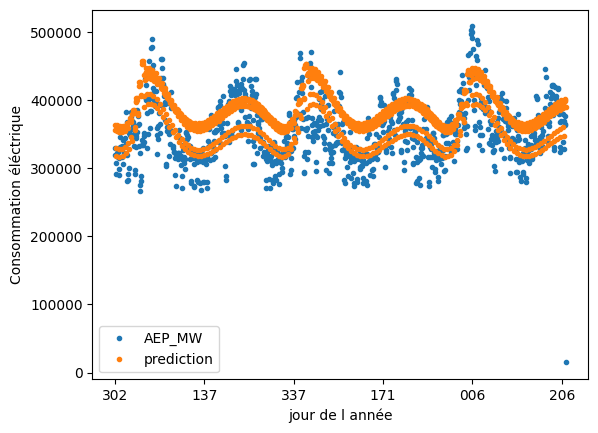

In [ ]:
# plot des résulats
test_predictions_p.plot(x='day_of_year',y=['AEP_MW','prediction'],marker='.',linestyle='none',xlabel='jour de l année',ylabel='Consommation électrique')

<AxesSubplot:title={'center':'Prévisions sur une année'}, xlabel='jour de l année', ylabel='Consommation électrique'>

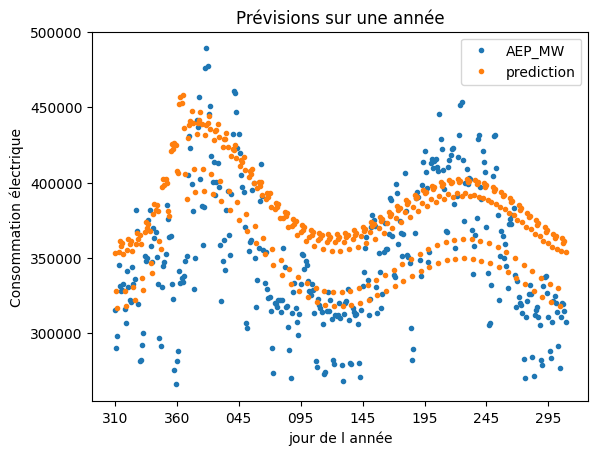

In [ ]:
# plot d'une année 
test_predictions_p.loc[(test_predictions_p.index>"2015-11-05") & (test_predictions_p.index<"2016-11-05")].plot(x='day_of_year',y=['AEP_MW','prediction'],marker='.', linestyle='none',xlabel='jour de l année',title='Prévisions sur une année',ylabel='Consommation électrique')

In [ ]:
#évaluation des prédictions
print("RMSE %s" %mean_squared_error(test_predictions_p["AEP_MW"],test_predictions_p["prediction"],squared= False))
print("MSE %s" %mean_absolute_error(test_predictions_p["AEP_MW"],test_predictions_p["prediction"]) )

RMSE 43975.71164713449
MSE 34961.37300042017


### Comparaison avec un degré suplémentaire

In [ ]:

# fit du modèle de degré 6
test_predictions_pbis = test

X = train[["day_of_year", "day_of_week"]].values

model = Pipeline([('poly', PolynomialFeatures(degree=6)),
                   ('linear', LinearRegression(fit_intercept=True))])
model.fit(X, train["AEP_MW"].values)
test_predictions_pbis["prediction"] = model.predict(test[["day_of_year", "day_of_week"]].values)

/tmp/ipykernel_33561/1541641764.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_predictions_pbis["prediction"] = model.predict(test[["day_of_year", "day_of_week"]].values)


#### Affichage des prédictions

<AxesSubplot:xlabel='jour de l année', ylabel='Consommation électrique'>

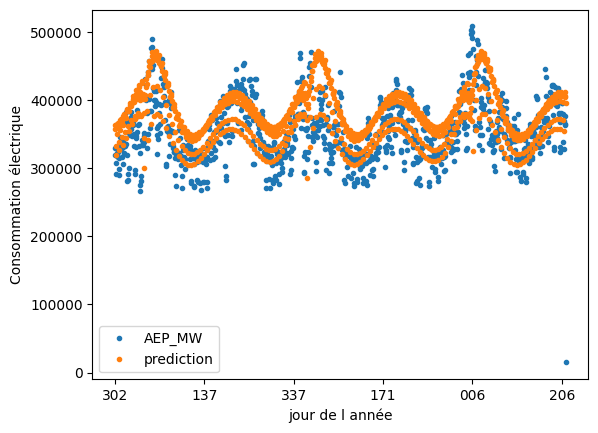

In [ ]:
# plot des prédictions
test_predictions_pbis.plot(x='day_of_year',y=['AEP_MW','prediction'],marker='.',linestyle='none',xlabel='jour de l année',ylabel='Consommation électrique')

<AxesSubplot:title={'center':'Prévisions d une année'}, xlabel='jour de l année', ylabel='Consommation électrique'>

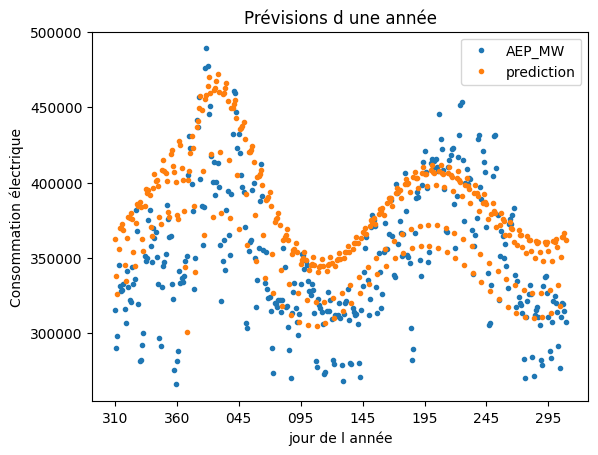

In [ ]:
#plot d'une année 
test_predictions_pbis.loc[(test_predictions_pbis.index>"2015-11-05") & (test_predictions_pbis.index<"2016-11-05")].plot(x='day_of_year',y=['AEP_MW','prediction'],marker='.', linestyle='none',xlabel='jour de l année',ylabel='Consommation électrique',title='Prévisions d une année')

#### Evaluation des prédictions avec un degré 6


In [ ]:
#pres
print("RMSE %s" %mean_squared_error(test_predictions_pbis["AEP_MW"],test_predictions_pbis["prediction"],squared= True))
print("MSE %s" %mean_absolute_error(test_predictions_pbis["AEP_MW"],test_predictions_pbis["prediction"]) )

RMSE 44714.75763384663
MSE 35070.344371712876


Nous avons affaire ici à un sur-apprentissage: à un degré supplémentaire l'algorithme surapprends sur les particularités de chaque donnée, et donc ses prédictions sont moins précises